# Getting started with Landmark Explanation

Note: you can run **[this notebook live in Google Colab](https://colab.research.google.com/github/softlab-unimore/landmark/blob/master/quick_start_DeepMatcher.ipynb)** and use free GPUs provided by Google.

This tutorial describes how to effortlessly explaining entity matching. Specifically, we will see how to match pairs of tuples (also called data records or table rows) to determine if they refer to the same real world entity. To do so, we will need labeled examples as input, i.e., tuple pairs which have been annotated as matches or non-matches. This will be used to train a model to explain using supervised learning. After that you will apply Landmark to get an explanation of the model over a record from your data. 

In this notebook you will use the [DeepMatcher](https://github.com/anhaidgroup/deepmatcher) library.



## Step 0. Setup

If you are running this notebook inside Colab, you will first need to install necessary packages by running the code below:

In [1]:
!pip install gdown
!gdown --id 14eQiG9sYM4LcCfJbwnoUgxZ0-PfpsWkQ -O ABT-BUY-data.zip
!unzip ABT-BUY-data.zip

Downloading...
From: https://drive.google.com/uc?id=14eQiG9sYM4LcCfJbwnoUgxZ0-PfpsWkQ
To: /content/ABT-BUY-data.zip
100% 39.6M/39.6M [00:00<00:00, 43.3MB/s]
Archive:  ABT-BUY-data.zip
   creating: Abt-Buy/
  inflating: Abt-Buy/train_simplified.csv  
  inflating: Abt-Buy/test_simplified.csv  
   creating: Abt-Buy/.ipynb_checkpoints/
  inflating: Abt-Buy/train_merged.csv  
  inflating: Abt-Buy/valid_simplified.csv  
  inflating: Abt-Buy/valid_merged.csv  
  inflating: Abt-Buy/test_merged.csv  
  inflating: Abt-Buy/best_model.pth  
  inflating: Abt-Buy/cacheddata.pth  


In [2]:
!pip install deepmatcher

     |████████████████████████████████| 50 kB 1.2 MB/s 
     |████████████████████████████████| 68 kB 3.6 MB/s 
  Using cached pybind11-2.9.0-py2.py3-none-any.whl (210 kB)
  Created wheel for deepmatcher: filename=deepmatcher-0.1.2.post2-py2.py3-none-any.whl size=54218 sha256=3571cd06acd6ed07529a35b590ea8d4b929a0868bc3cdd2b884795e9143f59d6
  Stored in directory: /root/.cache/pip/wheels/94/42/1d/81a0ff6bd1a807a9cc51c4a2fc5459292d5d486346ce925481
  Created wheel for fasttext: filename=fasttext-0.9.2-cp37-cp37m-linux_x86_64.whl size=3130296 sha256=845b9639fa21d59c44e5fd4d205020e570c68471b8866cc0f708e404a887af74
  Stored in directory: /root/.cache/pip/wheels/4e/ca/bf/b020d2be95f7641801a6597a29c8f4f19e38f9c02a345bab9b
Successfully built deepmatcher fasttext


### clone landmark code

In [3]:
!git clone https://github.com/softlab-unimore/landmark.git
!pip install -r landmark/requirements.txt

Cloning into 'landmark'...
remote: Enumerating objects: 145, done.
remote: Counting objects: 100% (145/145), done.
remote: Compressing objects: 100% (101/101), done.
remote: Total 145 (delta 62), reused 111 (delta 37), pack-reused 0
Receiving objects: 100% (145/145), 34.32 MiB | 13.96 MiB/s, done.
Resolving deltas: 100% (62/62), done.
     |████████████████████████████████| 275 kB 1.5 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=69b67270863a336c96d68e47fe93e773a4b432df477ea5b8d39bbb8c128f3d9d
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import deepmatcher as dm

### Load data for entity matching

Now let's get some sample data to play with in this tutorial.

In [5]:
dataset_path = '/content/Abt-Buy/'

simplified_columns = ['id','left_id','right_id','label','left_name','right_name']
train_df = pd.read_csv(dataset_path + 'train_merged.csv')[simplified_columns]
valid_df = pd.read_csv(dataset_path + 'valid_merged.csv')[simplified_columns]
test_df = pd.read_csv(dataset_path + 'test_merged.csv')[simplified_columns]

# train_df.to_csv(dataset_path + 'train_simplified.csv', index=False)
# valid_df.to_csv(dataset_path + 'valid_simplified.csv', index=False)
# test_df.to_csv(dataset_path + 'test_simplified.csv', index=False)

exclude_attrs=['id','left_id','right_id', 'label']

In [6]:
train, validation, test = dm.data.process(path=dataset_path,
    train='train_simplified.csv', validation='valid_simplified.csv', test='test_simplified.csv', ignore_columns=exclude_attrs )


In [7]:
model = dm.MatchingModel()

Training takes some minutes...

In [8]:
%%time 
#skip training. I saved the model state for you.
# model.run_train(train, validation, best_save_path=dataset_path+'best_model.pth', epochs=15, pos_neg_ratio=3, batch_size=128)


CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.25 µs


In [9]:
model.load_state(dataset_path+'best_model.pth')

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:1000: UserWarning: Using non-full backward hooks on a Module that does not take as input a single Tensor or a tuple of Tensors is deprecated and will be removed in future versions. This hook will be missing some of the grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using non-full backward hooks on a Module that does not take as input a "
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:1025: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


In [10]:
model.run_eval(test)

===>  EVAL Epoch 8


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:1000: UserWarning: Using non-full backward hooks on a Module that does not take as input a single Tensor or a tuple of Tensors is deprecated and will be removed in future versions. This hook will be missing some of the grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using non-full backward hooks on a Module that does not take as input a "
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:1025: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:990: UserWarning: Using non-full backward

Finished Epoch 8 || Run Time:    1.9 | Load Time:    1.2 || F1:  32.17 | Prec:  30.94 | Rec:  33.50 || Ex/s: 609.69



tensor(32.1678, device='cuda:0')

## Step2. Explanation using Landmark

In [11]:
from landmark import Landmark

In [12]:
# The explainer takes a predict method to analyse its behavior. 
# To this end I prepared for you a wrapper for DeepMatcher.
from IPython.utils import io
import os
#from landmark.wrapper.DMWrapper import DMWrapper

class DMWrapper(object):
    def __init__(self, dm_trained_model, exclude_attrs, one_by_one=False):
        self.dm = dm_trained_model
        self.exclude_attrs = exclude_attrs
        self.one_by_one = one_by_one

    def predict(self, dataset):
        """

        Args:
            dataset: dataset to be predicted wih the same structure of the training dataset

        Returns: list of match scores

        """

        with io.capture_output() as captured:
            self.predictions = []
            file_path = f'/tmp/candidate.csv'
            if self.one_by_one:
                for i in range(dataset.shape[0]):
                    dataset.iloc[[i]].to_csv(file_path, index_label='id')  # /tmp/ path for colab env

                    candidate = dm.data.process_unlabeled(path=file_path, trained_model=self.dm,
                                                          ignore_columns=self.exclude_attrs)
                    self.predictions += [self.dm.run_prediction(candidate)]
                os.remove(file_path)
                res = pd.concat(self.predictions)['match_score'].values
            else:
                dataset.to_csv(file_path, index_label='id')  # /tmp/ path for colab env
                candidate = dm.data.process_unlabeled(path=file_path, trained_model=self.dm,
                                                      ignore_columns=self.exclude_attrs)
                self.predictions = self.dm.run_prediction(candidate)
                os.remove(file_path)
                res = self.predictions['match_score'].values
        return res

dm_wrapped = DMWrapper(model, exclude_attrs=exclude_attrs)

In [13]:
test_df.head()

,id,left_id,right_id,label,left_name,right_name
0,0,445,910,0,sony pink cyber-shot 7.2 megapixel digital cam...,olympus fe-360 digital camera pink 226540
1,1,477,910,0,sony silver cyber-shot digital camera dscw150,olympus fe-360 digital camera pink 226540
2,2,445,415,0,sony pink cyber-shot 7.2 megapixel digital cam...,sony lcs-twa/b cyber-shot camera case lcstwa/b
3,3,483,415,0,sony red cyber-shot digital camera dscw170r,sony lcs-twa/b cyber-shot camera case lcstwa/b
4,4,241,415,0,sony lcs-twa/r red soft leather carrying case ...,sony lcs-twa/b cyber-shot camera case lcstwa/b


In [14]:
explainer = Landmark(dm_wrapped.predict, test_df, exclude_attrs=exclude_attrs, lprefix='left_', rprefix='right_', split_expression=r' ')

In [15]:
%%time 
preds = dm_wrapped.predict(test_df)

INFO:deepmatcher.data.field:Downloading vectors from https://drive.google.com/uc?export=download&id=1Vih8gAmgBnuYDxfblbT94P6WjB7s1ZSh to /root/.vector_cache/wiki.en.bin
INFO:deepmatcher.data.field:Unable to fetch cached English Word Embeddings from https://drive.google.com/uc?export=download&id=1Vih8gAmgBnuYDxfblbT94P6WjB7s1ZSh
INFO:deepmatcher.data.field:Extracting vectors into /root/.vector_cache


CPU times: user 2min 55s, sys: 1min 5s, total: 4min 1s
Wall time: 16min 14s


Select an item to explain.

In [16]:
el = test_df[test_df.id==270]
display(el)

,id,left_id,right_id,label,left_name,right_name
270,270,574,399,0,sony digital slr camera with lens kit dslra200w,nikon digital camera leather case 5811


### Explain a NO-MATCH item with token injection mechanism
Call explain to generate the explanation.

---


By default the **conf** parameter is set to 'auto' it means that the perturbation strategy depends on the label (that must exist in the DataFrame columns). 

*   If label == 1 --> *single* perturbation with landmark.
*   If label == 0 --> *double* perturbation with landmark. (*double* means that we inject tokens from the landmark description into the perturbed description) see the paper for more.

In [17]:
%%time
exp = explainer.explain(el)

CPU times: user 1.93 s, sys: 204 ms, total: 2.13 s
Wall time: 2.05 s


In [18]:
exp

,index,id,column,position,word,word_prefix,impact,conf
0,0,270,left_name,6,kit,A06_kit,-0.064201,right_landmark_injection
1,1,270,left_name,9,leather,A09_leather,0.037769,right_landmark_injection
2,2,270,left_name,0,sony,A00_sony,0.033261,right_landmark_injection
3,3,270,left_name,2,slr,A02_slr,-0.020005,right_landmark_injection
4,4,270,left_name,1,digital,A01_digital,-0.008917,right_landmark_injection
5,5,270,left_name,8,nikon,A08_nikon,0.007877,right_landmark_injection
6,6,270,left_name,7,dslra200w,A07_dslra200w,0.006884,right_landmark_injection
7,7,270,left_name,10,case,A10_case,0.006683,right_landmark_injection
8,8,270,left_name,5,lens,A05_lens,0.004855,right_landmark_injection
9,9,270,left_name,3,camera,A03_camera,-0.003743,right_landmark_injection


,id,left_id,right_id,label,left_name,right_name
270,270,574,399,0,sony digital slr camera with lens kit dslra200w,nikon digital camera leather case 5811


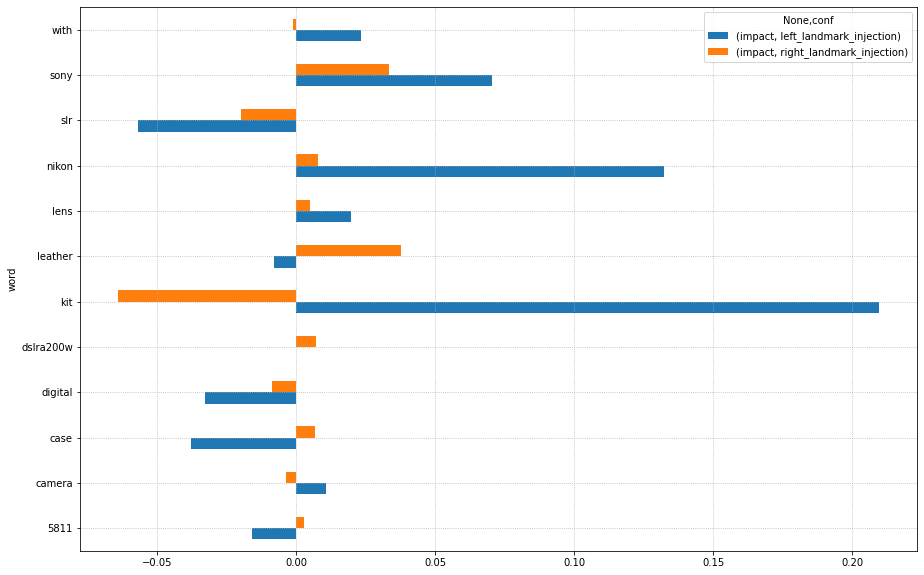

In [19]:
to_plot = exp
figsize = (15,10)
aggregated = to_plot.pivot_table(index='word',values=['impact'],columns=['conf'], aggfunc='max' )
plot = aggregated.plot(kind='barh', figsize=figsize,)
plt.gca().grid(True, linestyle=':', axis='both')
el

,left_name,right_name
270,sony digital slr camera with lens kit dslra200w,nikon digital camera leather case 5811


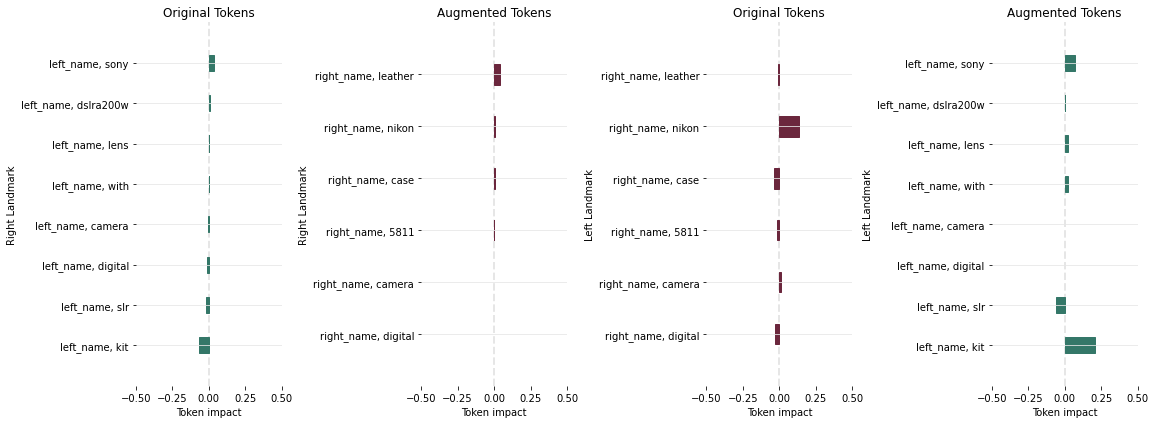

In [20]:
explainer.plot(exp, el)
el[['left_name','right_name']]

In [21]:
explainer.double_explanation_conversion(exp, el)

,column,position,word,score_right_landmark,score_left_landmark
0,left_name,6,kit,-0.064201,0.209533
2,left_name,0,sony,0.033261,0.070387
3,left_name,2,slr,-0.020005,-0.056932
4,left_name,1,digital,-0.008917,0.000000
6,left_name,7,dslra200w,0.006884,-0.000293
8,left_name,5,lens,0.004855,0.019734
9,left_name,3,camera,-0.003743,0.000000
11,left_name,4,with,-0.001151,0.023208
13,right_name,0,nikon,0.007877,0.132138
16,right_name,4,case,0.006683,-0.037978


### NO-MATCH with 'single' mechanism

In [22]:
exp = explainer.explain(el, conf='single')

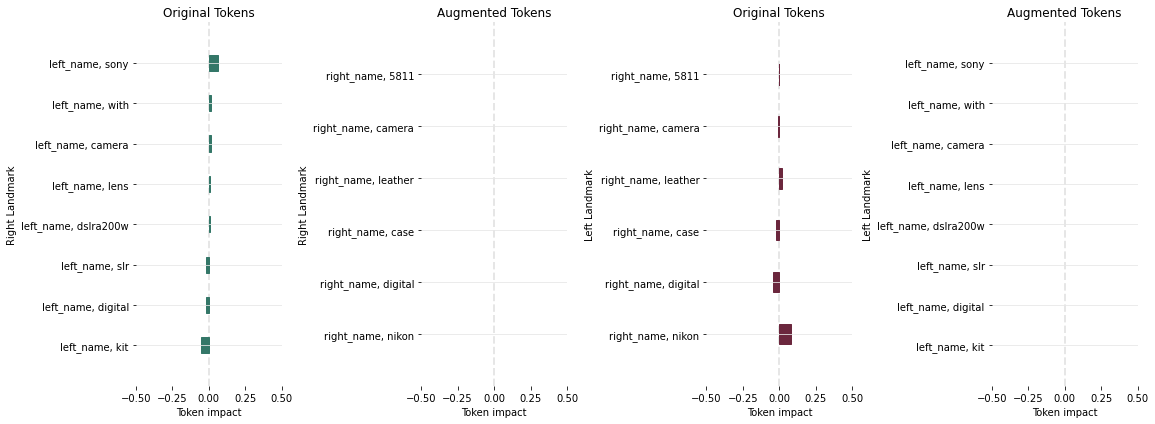

In [23]:
explainer.plot(exp, el) # No augmented (injected) tokens

,id,left_id,right_id,label,left_name,right_name
270,270,574,399,0,sony digital slr camera with lens kit dslra200w,nikon digital camera leather case 5811


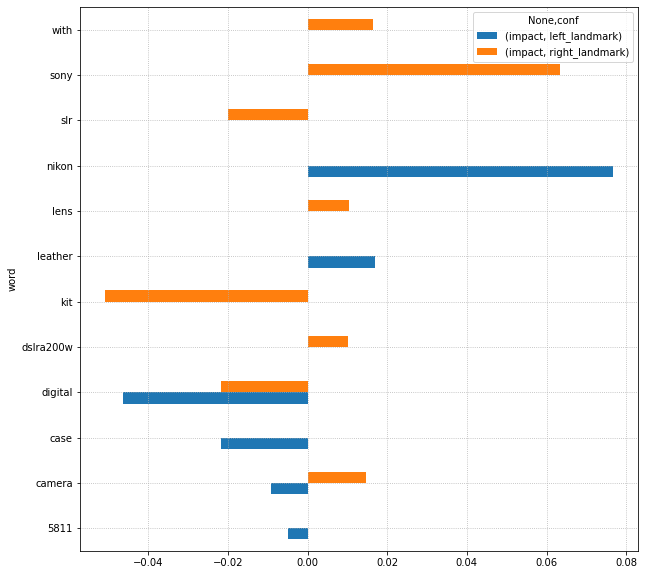

In [24]:
to_plot = exp
figsize = (10,10)
aggregated = to_plot.pivot_table(index='word',values=['impact'],columns=['conf'], aggfunc='max' )
plot = aggregated.plot(kind='barh', figsize=figsize,)
plt.gca().grid(True, linestyle=':', axis='both')
el